### Installing Required Libraries

In [1]:
! pip install numpy

In [2]:
! pip install pandas

In [3]:
! pip install scikit-learn

In [106]:
! pip install matplotlib

In [4]:
! pip install joblib

In [89]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 4.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.0 MB 4.7 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.0 MB 5.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 5.7 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 5.9 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 6.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 6.3 MB/s eta 0:00:01
   ---------------

In [10]:
! pip install openpyxl

### Importing Libraries and Loading Dataset

In [246]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

In [247]:
#Loading data
#Defining file path of the data
file_path = r"C:\Users\chand\Desktop\Learn Power BI\Churn Analysis and Prediction\Prediction_Data.xlsx"

#Defining sheet name to read the data
sheet_name = "vw_ChurnData"

#Reading the data file from the specified sheet into pandas DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

#First look of the data(first 5 rows)
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


### Exploring Dataset

In [248]:
#Dataset Columns
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [249]:
#Data has some Missing values let's impute them
df['Value_Deal'] = df['Value_Deal'].replace(np.nan,'None')
df['Internet_Type']=df['Internet_Type'].replace(np.nan,'None')

In [250]:
#Checking Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   6007 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                6007 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [251]:
#Checking Data description
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844


### Data Preprocessing

In [252]:
#Data Preprocessing
#Dropping columns that won't be used for prediction
df.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1,inplace=True)

In [253]:
#Creating a ist of column to be label encoded
columns_to_encode = ['Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method']

In [254]:
#Encoding categorical variables except the target variable
label_encoders={}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column]=label_encoders[column].fit_transform(df[column])

In [255]:
#Encoding the target variable 'Customer_Status' manually
df['Customer_Status'] = df['Customer_Status'].map({'Stayed':0,'Churned':1})

### Splitting the data

In [256]:
#Splitting the data into training and test set
X = df.drop('Customer_Status', axis=1)
y = df['Customer_Status']

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Training RandomForest model

In [258]:
#Initializing the model
rf_model = RandomForestClassifier()

#Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Evaluating the model

In [259]:
#Making predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[787  60]
 [130 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       847
           1       0.79      0.63      0.70       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



### Feature Importance

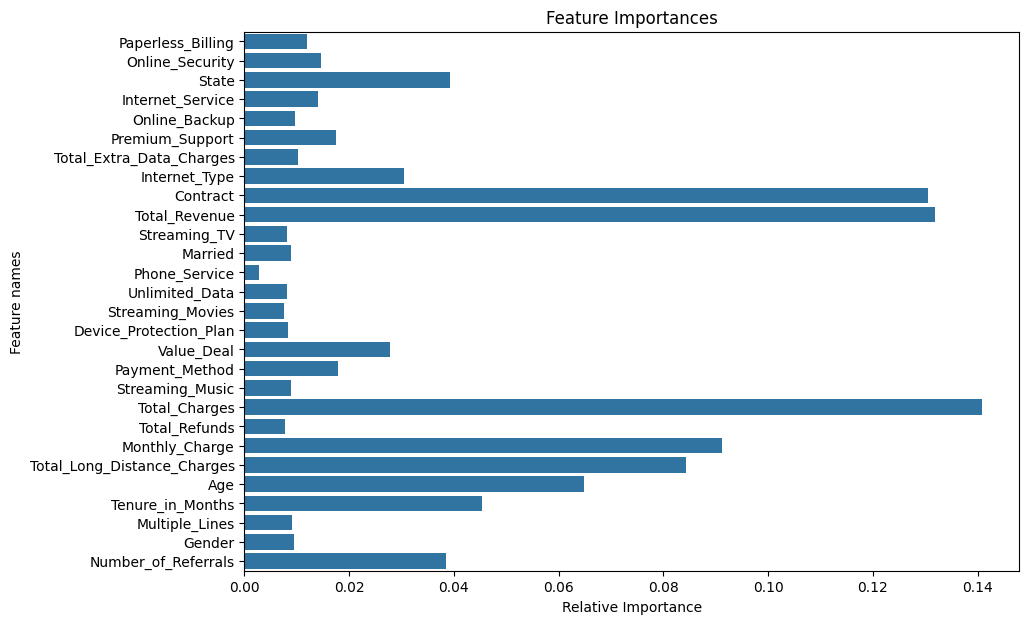

In [260]:
#Plotting Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances[::-1])

plt.figure(figsize=(10,7))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances")
plt.xlabel("Relative Importance")
plt.ylabel("Feature names")
plt.show()

### Using the model for prediction on new data

In [261]:
#Loading the new data
#Defining file path of the data
file_path = r"C:\Users\chand\Desktop\Learn Power BI\Churn Analysis and Prediction\Prediction_Data.xlsx"

#Defining sheet name to read the data
sheet_name = "vw_JoinData"

#Reading the data file from the specified sheet into pandas DataFrame
new_df = pd.read_excel(file_path, sheet_name=sheet_name)

#First look of the data(first 5 rows)
new_df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11751-TAM,Female,18,No,Tamil Nadu,5,7,Deal 5,No,No,...,Mailed Check,24.299999,38.450001,0.0,0,0.000000,38.450001,Joined,Others,Others
1,12056-WES,Male,27,No,West Bengal,2,20,NaN,Yes,No,...,Bank Withdrawal,90.400002,268.450012,0.0,0,94.440002,362.890015,Joined,Others,Others
2,12136-RAJ,Female,25,Yes,Rajasthan,2,35,NaN,Yes,No,...,Bank Withdrawal,19.900000,19.900000,0.0,0,11.830000,31.730000,Joined,Others,Others
3,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
4,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others


### Data Preprocessing

In [262]:
#Data has some Missing values let's impute them
new_df['Value_Deal'] = new_df['Value_Deal'].replace(np.nan,'None')
new_df['Internet_Type']=new_df['Internet_Type'].replace(np.nan,'None')

In [263]:
# Retaining the original DataFrame to preserve unencoded columns
original_df = new_df.copy()

In [264]:
#Retaining the Customer_ID column
customer_ids = new_df['Customer_ID']

In [265]:
#Dropping columns that won't be used for prediction
new_df.drop(['Customer_ID','Churn_Category','Customer_Status','Churn_Reason'],axis=1,inplace=True)

In [266]:
# Encode categorical variables using the saved label encoders
for column in new_df.select_dtypes(include=['object']).columns:
    new_df[column] = label_encoders[column].transform(new_df[column])

### Making Prediction

In [267]:
#Making prediction
new_predictions = rf_model.predict(new_df)

#Adding predictions to the original dataframe
original_df['Customer_Status_Predicted']=new_predictions

#Filtering the dataframe to include only records predicted as "Churned"
original_df = original_df[original_df['Customer_Status_Predicted']==1]

In [268]:
#Saving the data
original_df.to_excel(r"C:\Users\chand\Desktop\Learn Power BI\Churn Analysis and Prediction\Prediction_Data.xlsx", index=False)